In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [23]:
# 一元二次
# f(x) = w1*x**2 + w2*x + b

# 二元一次
# f(x1,x2) = w1*x1 + w2*x2 + b

X = np.linspace(0,10,num = 500).reshape(-1,1)

X = np.concatenate([X**2,X],axis = 1)
X.shape

(500, 2)

Text(0.5, 1.0, 'w1:1.w2:1.b:4')

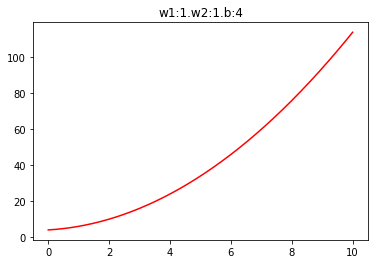

In [24]:
w = np.random.randint(1,10,size = 2)
b = np.random.randint(-5,5,size = 1)
# 矩阵乘法
y = X.dot(w) + b
plt.plot(X[:,1],y,color = 'r')

plt.title('w1:%d.w2:%d.b:%d'%(w[0],w[1],b[0]))

### 使用sklearn自带的算法，预测


[1. 1.] 3.999999999999993


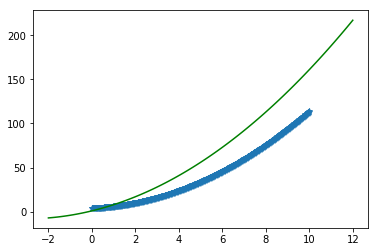

In [25]:
lr = LinearRegression()

lr.fit(X,y)

print(lr.coef_,lr.intercept_)

plt.scatter(X[:,1],y,marker = '*')

x = np.linspace(-2,12,100)

plt.plot(x,1*x**2 + 6*x + 1,color = 'green')

### 自己手写的线性回归，拟合多属性，多元方程

In [26]:
# epoch 训练的次数，梯度下降训练多少
def gradient_descent(X,y,lr,epoch,w,b):
#     一批量多少，长度
    batch = len(X)
    for i in range(epoch):
#         d_lost:是损失的梯度
        d_loss = 0
#         梯度，斜率梯度
        dw = [0 for _ in range(len(w))]
#        截距梯度
        db = 0
        for j in range(batch):
            y_ = 0 #预测的值 预测方程 y_ = f(x) = w1*x1 + w2*x2 + b
            for n in range(len(w)):
                y_ += X[j][n]*w[n]
            y_ += b
#             (y - y_)**2 -----> 2*(y-y_)*(-1)
#             (y_- y)**2  -----> 2*(y_ - y)*(1)
            d_loss = -(y[j] - y_)
            for n in range(len(w)):
                dw[n] += X[j][n]*d_loss/float(batch)
            db += 1*d_loss/float(batch)
#         更新一下系数和截距，梯度下降
        for n in range(len(w)):
            w[n] -= dw[n]*lr[n]
        b -= db*lr[0]
    return w,b

In [30]:
lr = [0.0001,0.0001]
w = np.random.randn(2)
b = np.random.randn(1)[0]
w_,b_ = gradient_descent(X,y,lr,5000,w,b)
print(w_,b_)

[1.00325157 1.22027686] 2.1550745865631895


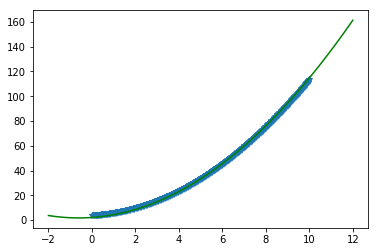

In [31]:
plt.scatter(X[:,1],y,marker = '*')

x = np.linspace(-2,12,100)

f = lambda x:w_[0]*x**2 + w_[1]*x + b_

plt.plot(x,f(x),color = 'green')